**Housekeeping**

Import feather file as dataframes

In [164]:
import pandas as pd
import numpy as np
from pathlib import Path
import get_reversions as gr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
%config InlineBackend.figure_format = 'svg'


gt = 'Greta Thunberg'
nk = 'Naomi Klein'

# Define the path

path_dataset = Path().cwd().parent / 'oii-fsds-wikipedia-main' / 'DataFrames'

# Import both datasets

greta = pd.read_feather(path_dataset / 'Greta Thunberg.feather')
naomi = pd.read_feather(path_dataset / 'Naomi Klein.feather')


In [225]:
#Sorting df by post date
#Dropping Subsequent Rows After First Contribution of User

greta = greta.dropna(subset=['userid'])
greta = greta.sort_values('timestamp', ascending=True)
greta = greta.drop_duplicates(subset=['userid'], keep='first', ignore_index=False)
greta = greta.reset_index(drop=True)
greta["cdf"] = (greta.index+1)/len(greta)
greta["gradient"] = np.gradient(greta["cdf"])/np.gradient(greta["timestamp"].astype(np.int64 )/1000000)
greta["gradient_norm"] = greta["gradient"].map(lambda x: x - greta["gradient"].min()) / (greta["gradient"].max() - greta["gradient"].min())

naomi = naomi.dropna(subset=['userid'])
naomi = naomi.sort_values('timestamp', ascending=True)
naomi = naomi.drop_duplicates(subset=['userid'], keep='first', ignore_index=False)
naomi = naomi.reset_index(drop=True)
naomi["cdf"] = (naomi.index+1)/len(naomi)
naomi["gradient"] = np.gradient(naomi["cdf"])/np.gradient(naomi["timestamp"].astype(np.int64 )/1000000)
naomi["gradient_norm"] = naomi["gradient"].map(lambda x: x - naomi["gradient"].min()) / (naomi["gradient"].max() - naomi["gradient"].min())
print(greta.head(3))

  revision_id                 timestamp   username    userid  \
0   871498596 2018-12-01 13:57:13+00:00  Gfosankar  17106820   
1   871844430 2018-12-03 20:22:51+00:00    Mongbei   4123465   
2   871922637 2018-12-04 06:13:37+00:00  Lopifalko  11116033   

                     comment  text_length  year month       cdf      gradient  \
0              start as stub          493  2018    12  0.000933  4.760872e-12   
1             /* Activism */         3459  2018    12  0.001866  8.063097e-12   
2  [[WP:SURNAME]] + copyedit         3439  2018    12  0.002799  3.075722e-11   

   gradient_norm  
0       0.000511  
1       0.000899  
2       0.003563  


Text(0.5, 1.0, 'CDF of #Unique Contributors to Wiki Page')

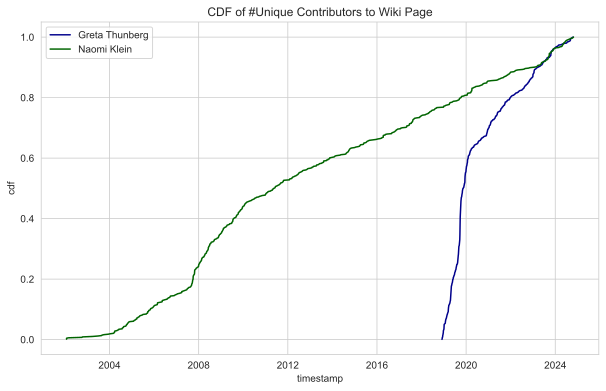

In [226]:
#Visualizing Both Charts

fig = plt.subplots(figsize=(10, 6))

sns.lineplot(x=greta["timestamp"],y=greta["cdf"],color = "darkblue",label="Greta Thunberg")
sns.lineplot(x=naomi["timestamp"],y=naomi["cdf"],color="darkgreen",label="Naomi Klein")
plt.title("CDF of #Unique Contributors to Wiki Page")


Takeaway: Both environmentalist clearly exist on very different timelines. Greta's rise to fame is a lot steeper than that of Naomi Klein. (Unsurprising)

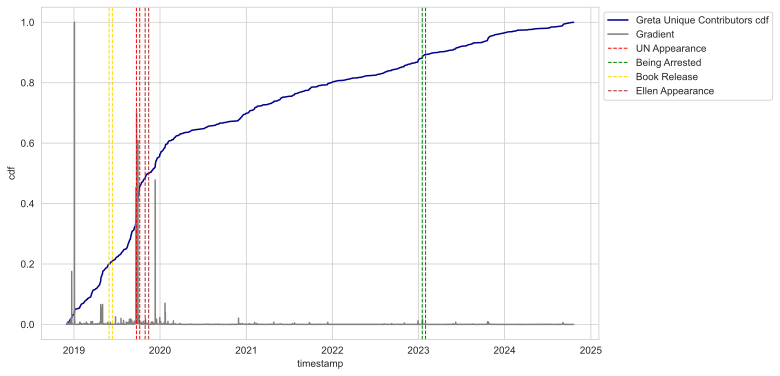

In [227]:
# Mapping Key Greta Milestones 
# 2 Comparisons were made. "Positive News" vs "Negative News" and "TV Apperance" vs "Book Release"
# Vertical bars indicate date of event and two weeks and after event

plt.subplots(figsize=(10, 6))
sns.lineplot(x=greta["timestamp"],y=greta["cdf"],color = "darkblue",label="Greta Unique Contributors cdf")
sns.lineplot(x=greta["timestamp"],y=greta["gradient_norm"], color = "grey",label="Gradient")
plt.axvline(x = pd.to_datetime('2019-9-23'),linewidth=1,ls='--',color='red',label = "UN Appearance")
plt.axvline(x = pd.to_datetime('2019-10-7'),linewidth=1,ls='--',color='red')
plt.axvline(x = pd.to_datetime('2023-1-17'),linewidth=1,ls='--',color='green', label = "Being Arrested")
plt.axvline(x = pd.to_datetime('2023-1-31'),linewidth=1,ls='--',color='green')
plt.axvline(x = pd.to_datetime('2019-5-30'),linewidth=1,ls='--',color='gold', label = "Book Release")
plt.axvline(x = pd.to_datetime('2019-6-13'),linewidth=1,ls='--',color='gold')
plt.axvline(x = pd.to_datetime('2019-10-30'),linewidth=1,ls='--',color='brown', label = "Ellen Appearance")
plt.axvline(x = pd.to_datetime('2019-11-14'),linewidth=1,ls='--',color='brown')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')


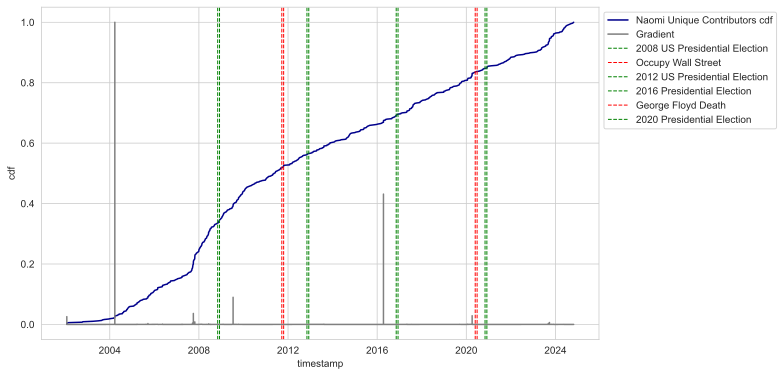

In [251]:
# Mapping Key Klein Milestones 
# Comparisons between elections and large protest movements were made.
# Vertical bars indicate date of event and one month and after event

plt.subplots(figsize=(10, 6))
sns.lineplot(x=naomi["timestamp"],y=naomi["cdf"],color = "darkblue",label="Naomi Unique Contributors cdf")
sns.lineplot(x=naomi["timestamp"],y=naomi["gradient_norm"], color = "grey",label="Gradient")
plt.axvline(x = pd.to_datetime('2008-11-4'),linewidth=1,ls='--',color='green', label = "2008 US Presidential Election")
plt.axvline(x = pd.to_datetime('2008-12-4'),linewidth=1,ls='--',color='green')
plt.axvline(x = pd.to_datetime('2011-9-21'),linewidth=1,ls='--',color='red',label = "Occupy Wall Street")
plt.axvline(x = pd.to_datetime('2011-10-21'),linewidth=1,ls='--',color='red')
plt.axvline(x = pd.to_datetime('2012-11-6'),linewidth=1,ls='--',color='green', label = "2012 US Presidential Election")
plt.axvline(x = pd.to_datetime('2012-12-6'),linewidth=1,ls='--',color='green')
plt.axvline(x = pd.to_datetime('2016-11-8'),linewidth=1,ls='--',color='green', label = "2016 Presidential Election")
plt.axvline(x = pd.to_datetime('2016-12-8'),linewidth=1,ls='--',color='green')
plt.axvline(x = pd.to_datetime('2020-5-26'),linewidth=1,ls='--',color='red', label = "George Floyd Death")
plt.axvline(x = pd.to_datetime('2020-6-26'),linewidth=1,ls='--',color='red')
plt.axvline(x = pd.to_datetime('2020-11-3'),linewidth=1,ls='--',color='green', label = "2020 Presidential Election")
plt.axvline(x = pd.to_datetime('2020-12-3'),linewidth=1,ls='--',color='green')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

Takeaway:
- The number of new editors to Naomi Klein's wikipedia page has no little to do with social movements even though she contributes heavily to discourse on capitalism and politics. 


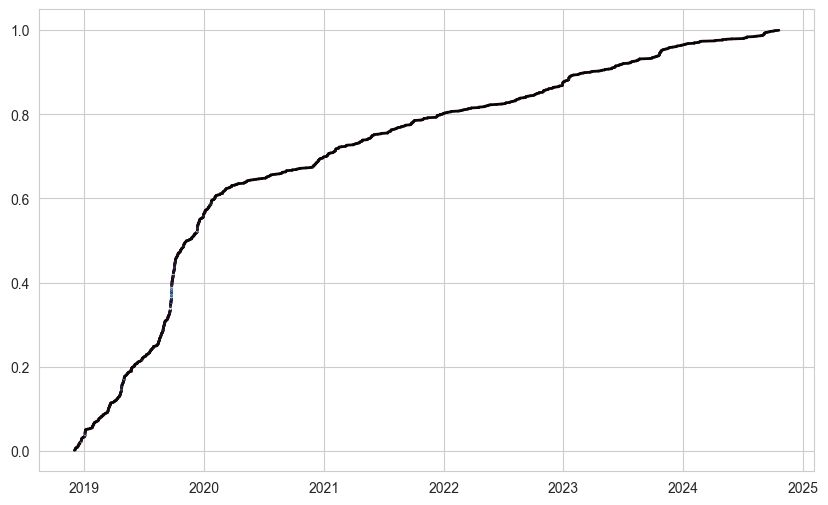

In [113]:
# zz failed
# Experimenting with gradients
 fig, ax = plt.subplots(figsize=(10, 6))

x = greta["timestamp"] 
y = greta['cdf']
z = greta["gradient_norm"]
palette = 'mako' 
colors = sns.color_palette(palette, n_colors=5, as_cmap=True)

for i in range(len(x)-1):
        sns.lineplot(x=[x[i], x[i+1]], 
                    y=[y[i], y[i+1]],
                    color=colors(z[i]*10),  # Use palette color
                    alpha=1,
                    linewidth=2)
